<a href="https://colab.research.google.com/github/comojin1994/Deep_Learning_Study/blob/master/3step_lecture/Improve_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

### Hyperparameter

In [0]:
EPOCHS = 100

### Model

In [0]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(32, use_bias=False)
        self.bn1 = tf.keras.layers.BatchNormalization()

        self.bn2 = tf.keras.layers.BatchNormalization()
        self.dense2 = tf.keras.layers.Dense(32, use_bias=False)
        
        self.bn3 = tf.keras.layers.BatchNormalization()
        self.dense3 = tf.keras.layers.Dense(64, use_bias=False)
        
        self.bn4 = tf.keras.layers.BatchNormalization()
        self.dense4 = tf.keras.layers.Dense(128, use_bias=False)
        
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x, training=False, mask=None):
        x = self.flatten(x)
        
        x = self.dense1(x)
        x = self.bn1(x, training)
        x = tf.nn.relu(x)

        h = self.bn2(x, training)
        h = tf.nn.relu(h)
        h = self.dense2(h)
        x = tf.concat([x, h], axis=-1)

        h = self.bn3(x, training)
        h = tf.nn.relu(h)
        h = self.dense3(h)
        x = tf.concat([x, h], axis=-1)

        h = self.bn4(x, training)
        h = tf.nn.relu(h)
        h = self.dense4(h)
        x = tf.concat([x, h], axis=-1)

        return self.dense5(x)

### Load Data

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# prefetch: 미리 데이터를 불러놓고 학습
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
model = MyModel()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss_object, metrics=metrics)

### Training(Baseline)

In [0]:
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=test_ds)

Train for 1875 steps, validate for 313 steps
Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5240 - accuracy: 0.8096 - val_loss: 0.4301 - val_accuracy: 0.8425
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3906 - accuracy: 0.8554 - val_loss: 0.4351 - val_accuracy: 0.8409
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3554 - accuracy: 0.8689 - val_loss: 0.3785 - val_accuracy: 0.8647
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3354 - accuracy: 0.8774 - val_loss: 0.3572 - val_accuracy: 0.8724
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3193 - accuracy: 0.8830 - val_loss: 0.3832 - val_accuracy: 0.8588
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3051 - accuracy: 0.8875 - val_loss: 0.3592 - val_accuracy: 0.8712
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2949 -

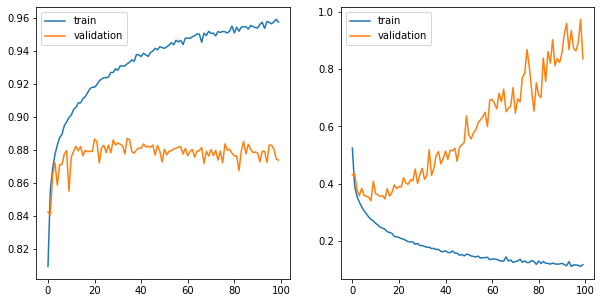

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

### Training(with Complex Model)

In [0]:
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=test_ds)

Train for 1875 steps, validate for 313 steps
Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5199 - accuracy: 0.8124 - val_loss: 0.4555 - val_accuracy: 0.8333
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4013 - accuracy: 0.8538 - val_loss: 0.3936 - val_accuracy: 0.8580
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3659 - accuracy: 0.8650 - val_loss: 0.4114 - val_accuracy: 0.8559
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3485 - accuracy: 0.8722 - val_loss: 0.3739 - val_accuracy: 0.8678
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3310 - accuracy: 0.8784 - val_loss: 0.3614 - val_accuracy: 0.8709
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3175 - accuracy: 0.8817 - val_loss: 0.3696 - val_accuracy: 0.8657
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3116

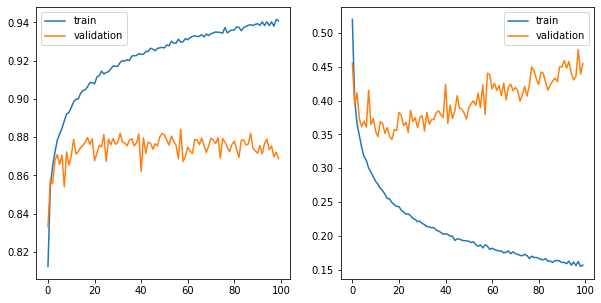

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()